<a href="https://colab.research.google.com/github/Mounikapaili/Mounika/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("/content/AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df["Month"]=pd.to_datetime(df['Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df.isnull().sum()

,0
Month,0
#Passengers,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df.set_index("Month",inplace=True)

In [ ]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

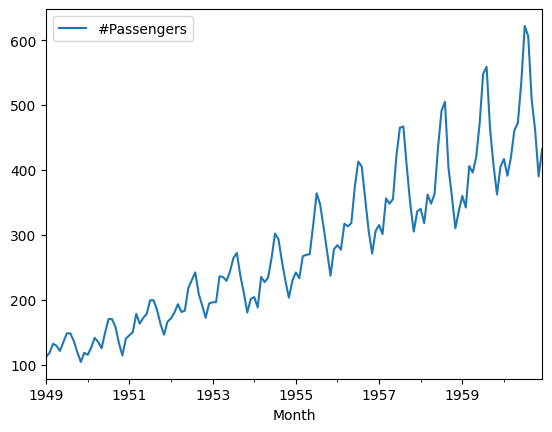

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)


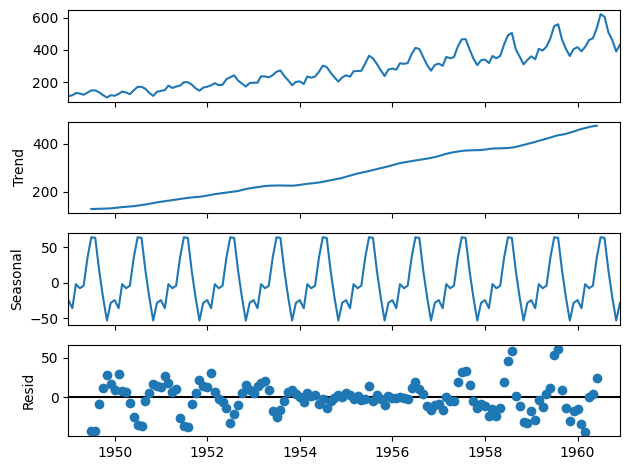

In [ ]:
decompose=seasonal_decompose(df)
print(decompose.plot())


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
test_result=adfuller(df)

In [ ]:
pval=test_result[1]

In [ ]:
pval

0.991880243437641

<Axes: xlabel='Month'>

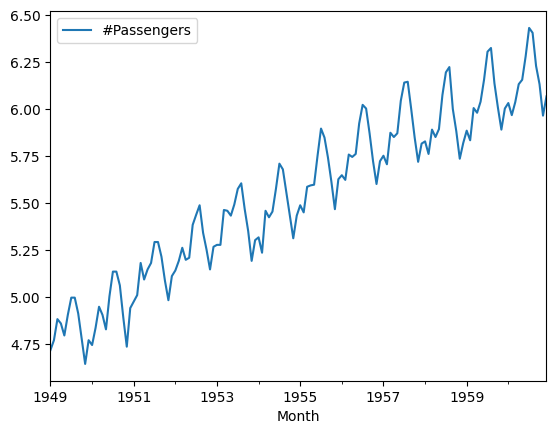

In [ ]:
first_log=np.log(df)
first_log=first_log.dropna()
first_log.plot()

In [ ]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

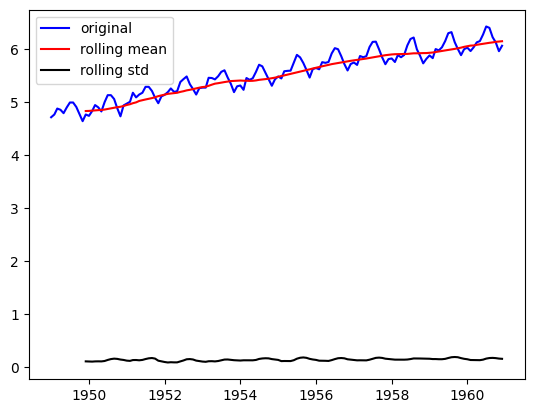

In [ ]:
plt.plot(first_log,color='blue',label='original')
plt.plot(mean_log,color='red',label='rolling mean')
plt.plot(std_log,color='black',label='rolling std')
plt.legend(loc='best')
plt.show()

In [ ]:
mean_log.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [ ]:
new_data=first_log-mean_log
new_data = new_data.dropna()
new_data.head(20)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [ ]:
res=adfuller(new_data)

In [ ]:
pval=res[1]
pval

0.022234630001242206

In [ ]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
train = new_data.iloc[:120]["#Passengers"]
test = new_data.iloc[120:]["#Passengers"]

In [ ]:
train

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


In [ ]:
test

,#Passengers
Month,
1959-12-01,-0.044481
1960-01-01,-0.027530
1960-02-01,-0.103067
1960-03-01,-0.036530
1960-04-01,0.046332
1960-05-01,0.060186
1960-06-01,0.175033
1960-07-01,0.315151
1960-08-01,0.282363


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
a_model=ARIMA(train,order=(6,1,6))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
a_model=a_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
new_data.tail()

,#Passengers,ARIMA predictions
Month,,
1960-08-01,0.282363,0.064783
1960-09-01,0.098235,0.040886
1960-10-01,-0.009230,0.031912
1960-11-01,-0.182690,0.026468
1960-12-01,-0.085789,0.034972


In [ ]:
new_data['ARIMA predictions']=a_model.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
new_data.tail(12)

,#Passengers,ARIMA predictions
Month,,
1960-01-01,-0.027530,-0.078208
1960-02-01,-0.103067,-0.102482
1960-03-01,-0.036530,-0.036334
1960-04-01,0.046332,0.081086
1960-05-01,0.060186,0.155306
1960-06-01,0.175033,0.192317
1960-07-01,0.315151,0.205018
1960-08-01,0.282363,0.177301
1960-09-01,0.098235,0.107395


In [ ]:
from sklearn.metrics import *

In [ ]:
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)
pdq=list(itertools.product(p,d,q))
rmse=[]
order1=[]
for i in pdq:
  model=ARIMA(train,order=i)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
  error=np.sqrt(mean_squared_error(test,pred))
  order1.append(i)
  rmse.append(error)
results = pd.DataFrame(index = order1, data = rmse,columns =['RMSE'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
results.sort_values(by='RMSE',ascending=True)

,RMSE
"(6, 1, 6)",0.068580
"(4, 1, 6)",0.072426
"(5, 1, 6)",0.074114
"(6, 1, 1)",0.097964
"(6, 1, 5)",0.111533
"(4, 1, 3)",0.114331
"(3, 1, 3)",0.115135
"(6, 1, 2)",0.124454
"(4, 1, 5)",0.125979
"(6, 1, 3)",0.134057


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train, order=(6,1,6),seasonal_order=(6,1,6,12))
model = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
new_data['S_predictions']= model.predict(start=len(train), end =len(train)+len(test)-1)

In [ ]:
new_data

,#Passengers,ARIMA predictions,S_predictions
Month,,,
1949-12-01,-0.065494,NaN,NaN
1950-01-01,-0.093449,NaN,NaN
1950-02-01,-0.007566,NaN,NaN
1950-03-01,0.099416,NaN,NaN
1950-04-01,0.052142,NaN,NaN
...,...,...,...
1960-08-01,0.282363,0.177301,0.310132
1960-09-01,0.098235,0.107395,0.120260
1960-10-01,-0.009230,0.021141,-0.012730


<Axes: xlabel='Month'>

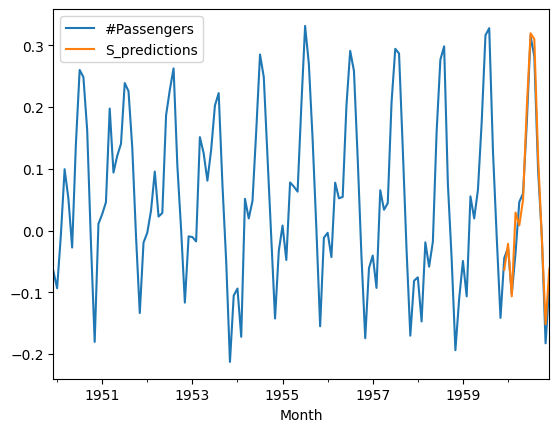

In [ ]:
new_data[["#Passengers","S_predictions"]].plot()

<Axes: xlabel='Month'>

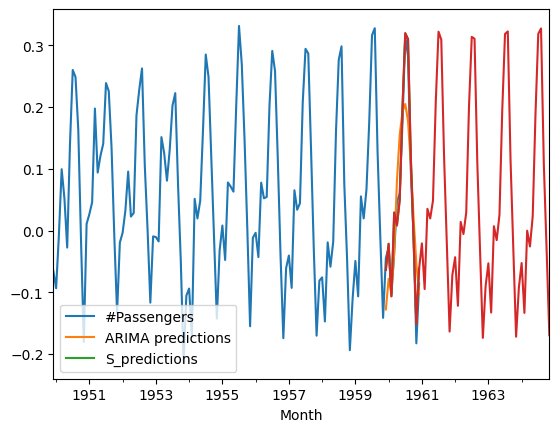

In [ ]:
future = model.forecast(steps = 60)
new_data.plot()
future.plot()